In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ds = pd.read_csv("heart_v2.csv")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, balanced_accuracy_score
)

In [3]:
X = ds.drop("heart disease", axis=1)
y = ds["heart disease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [5]:
print("Training Accuracy:", accuracy_score(y_train, dt.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, dt.predict(X_test)))


Training Accuracy: 1.0
Testing Accuracy: 0.6666666666666666


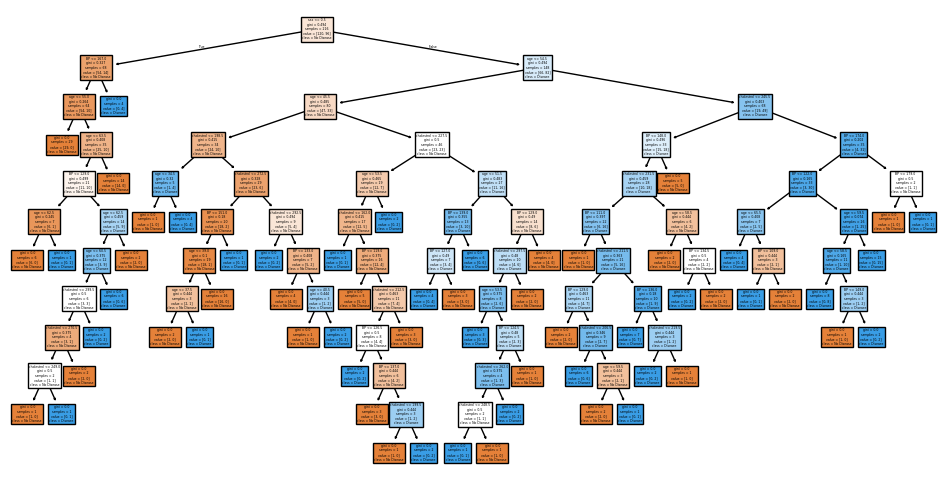

In [6]:
plt.figure(figsize=(12, 6))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

In [7]:
dt2 = DecisionTreeClassifier(
    max_depth=3,              # limit tree depth
    min_samples_split=10,     # require at least 10 samples to split
    min_samples_leaf=5,       # each leaf must have at least 5 samples
    random_state=42
)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [8]:
train_acc = accuracy_score(y_train, dt2.predict(X_train))
test_acc = accuracy_score(y_test, dt2.predict(X_test))
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.7175925925925926
Testing Accuracy: 0.6666666666666666


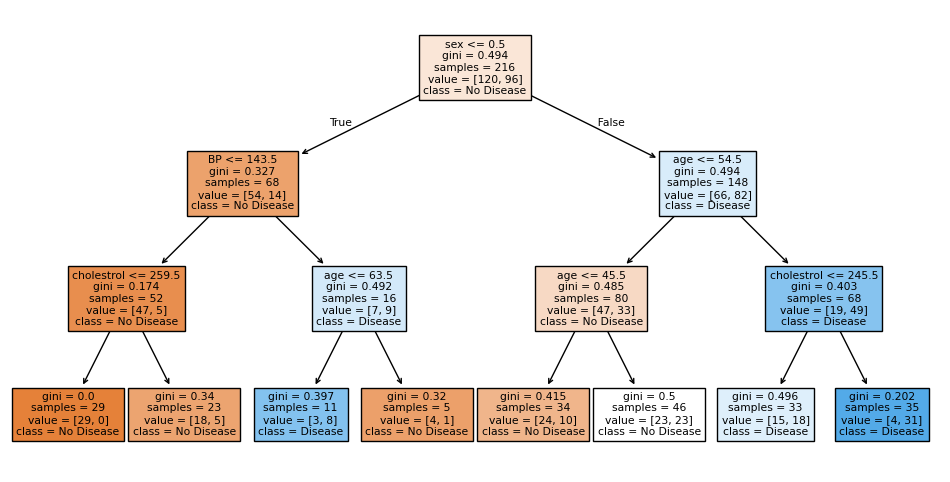

In [9]:
plt.figure(figsize=(12, 6))
plot_tree(dt2, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

In [10]:
tree = dt2.tree_
def node_rule(node):
    if tree.feature[node] == -2:
        return "Leaf"
    return f"If {X.columns[tree.feature[node]]} <= {tree.threshold[node]:.2f}"
print("Root split:", node_rule(0))
print("Left child split:", node_rule(tree.children_left[0]))
print("Right child split:", node_rule(tree.children_right[0]))

Root split: If sex <= 0.50
Left child split: If BP <= 143.50
Right child split: If age <= 54.50


In [11]:
y_pred = dt2.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[22  8]
 [10 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        30
           1       0.64      0.58      0.61        24

    accuracy                           0.67        54
   macro avg       0.66      0.66      0.66        54
weighted avg       0.66      0.67      0.66        54



In [16]:
y_scores = dt2.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print("AUC Score:", roc_auc)


AUC Score: 0.7236111111111111


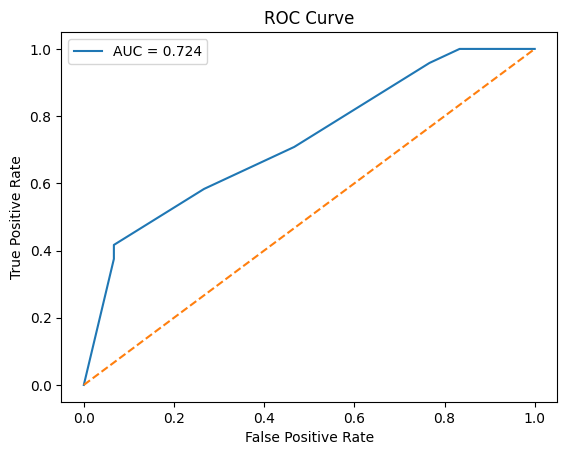

In [17]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [18]:
param_grid = {
    "max_depth": [2, 3, 4, 5, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]})

In [19]:
print("\nBest Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)
print("Test Accuracy with best model:", accuracy_score(y_test, grid.best_estimator_.predict(X_test)))



Best Params: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy: 0.694291754756871
Test Accuracy with best model: 0.6296296296296297


In [20]:
print("\nClass Distribution:\n", y.value_counts())
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))


Class Distribution:
 heart disease
0    150
1    120
Name: count, dtype: int64
Balanced Accuracy: 0.6583333333333333
